In [80]:
import numpy as np
from numpy import pi
import scipy
from scipy import linalg as la
import scipy.optimize
from scipy.optimize import minimize
from matplotlib import pyplot as plt
%matplotlib inline
from importlib import reload
import quantumsim.circuit
import quantumsim.sparsedm
import DiCarloLab_quantum_simulations as qsimulations


In [2]:
def multiround_block_0(circuit, **kwargs):# qubit_param, qubit_gate={},
    '''
    qubit_param=(['q1', 'q2', 'q3'...],
    [{'noise_flag':True, 't1':30000, 't2':30000}, 
    {'noise_flag':True, 't1':30000, 't2':30000},
    {'noise_flag':True, 't1':30000, 't2':30000}])
    The parameters can be different for each qubit
    '''
    '''
    qubit_gate = {'msmt_time':600, 'gate_time_1q':20, 'gate_time_2q':40}
    if qubit_gate is not introduced it takes the default values from qsoverlay 600ns
    '''
    '''
    Not creating a new circuitbuilder every time the results slightly differ
    This can be dangerous, so it is better to a new circuitbuilder everytime
    '''
    # readout_error is contained it **kwargs and passed to Sz_measure function

    # Variable assignation used for all parts of the function

#qubit_gate = qubit_gate

#qubit_dic, gate_set, composite_gate_set = qsimulations.qubitdef(qubit_parameters=qubit_param,
#                                                                    qubit_gate=qubit_gate)

    if 'finalize' in kwargs.keys():
        finalize = kwargs['finalize']
    else:
        finalize = True

    # Measure of Identity, ZI, IZ, ZZ, only one circuit needed
#cir = qsimulations.create_circuitbuilder(qubit_dic=qubit_dic, gate_set=gate_set,
#                                         composite_gate_set=composite_gate_set)
    qsimulations.prepare_state(state_prep_ops=(['RX', 'CZ', 'RX'], ['QL', ('QR', 'QL'), 'QL'],
                               [pi/2, 0, pi/2]), cir=circuit)
    qsimulations.construct_measurement(measurement_list=(['Measure'], ['QL']),
                                       cir=circuit, finalize=finalize, **kwargs)
    
    #sdm=qsimulations.construc_sdm(cir)
    
    return(circuit)

In [3]:
def multiround_block_1(circuit, **kwargs):# qubit_param, qubit_gate={},
    '''
    qubit_param=(['q1', 'q2', 'q3'...],
    [{'noise_flag':True, 't1':30000, 't2':30000}, 
    {'noise_flag':True, 't1':30000, 't2':30000},
    {'noise_flag':True, 't1':30000, 't2':30000}])
    The parameters can be different for each qubit
    '''
    '''
    qubit_gate = {'msmt_time':600, 'gate_time_1q':20, 'gate_time_2q':40}
    if qubit_gate is not introduced it takes the default values from qsoverlay 600ns
    '''
    '''
    Not creating a new circuitbuilder every time the results slightly differ
    This can be dangerous, so it is better to a new circuitbuilder everytime
    '''
    # readout_error is contained it **kwargs and passed to Sz_measure function

    # Variable assignation used for all parts of the function

#qubit_gate = qubit_gate

#qubit_dic, gate_set, composite_gate_set = qsimulations.qubitdef(qubit_parameters=qubit_param,
#                                                                    qubit_gate=qubit_gate)

    if 'finalize' in kwargs.keys():
        finalize = kwargs['finalize']
    else:
        finalize = True

    # Measure of Identity, ZI, IZ, ZZ, only one circuit needed
#cir = qsimulations.create_circuitbuilder(qubit_dic=qubit_dic, gate_set=gate_set,
#                                         composite_gate_set=composite_gate_set)
    qsimulations.prepare_state(state_prep_ops=(['RX', 'RX', 'CZ', 'RX'], ['QL', 'QR', ('QR', 'QL'), 'QL'],
                               [pi/2, pi, 0, pi/2]), cir=circuit)
    qsimulations.construct_measurement(measurement_list=(['Measure'], ['QL']),
                                       cir=circuit, finalize=finalize, **kwargs)
    
    #sdm=qsimulations.construc_sdm(cir)
    
    return(circuit)

In [155]:
reload(qsimulations)

<module 'DiCarloLab_quantum_simulations' from '/home/xabomon/GitHubRepos/DiCarloLab/IARPA_Project/Multiround_parity_meas/DiCarloLab_quantum_simulations.py'>

In [156]:
reload(qsimulations.setup)

<module 'qsoverlay.DiCarlo_setup' from '/home/xabomon/qsoverlay/qsoverlay/DiCarlo_setup.py'>

In [157]:
qubit_gate_param={'msmt_time':3000,'gate_time_1q':20,'gate_time_2q':260, 'interval_time':1600}

qubit_parameters = (['QL', 'QR'], [{'noise_flag':True, 't1':38000,'t2':28000,
                                    'dephasing_axis':0.0,'dephasing_angle':0.0,'dephasing':0.0,
                                    'p_exc_init':0.0,'p_dec_init':0.0,'p_exc_fin':0.0,'p_dec_fin':0.0,
                                    'msmt_time':3000, 'dephase_var':0*(1e-2/(2*pi)), 'interval_time':1500},
                                   {'noise_flag':True, 't1':27000,'t2':19000,
                                    'dephasing_axis':0.0,'dephasing_angle':0.0,'dephasing':0.0,
                                    'p_exc_init':0.0,'p_dec_init':0.0,'p_exc_fin':0.0,'p_dec_fin':0.0,
                                    'msmt_time':3000, 'dephase_var':0*(1e-2/(2*pi)), 'interval_time':1500}])

In [191]:
qubit_dic, gate_set, composite_gate_set = qsimulations.qubitdef(qubit_parameters=qubit_parameters,
                                                                    qubit_gate=qubit_gate_param)
cir0 = qsimulations.create_circuitbuilder(qubit_dic=qubit_dic, gate_set=gate_set,
                                             composite_gate_set=composite_gate_set)
cir1 = qsimulations.create_circuitbuilder(qubit_dic=qubit_dic, gate_set=gate_set,
                                             composite_gate_set=composite_gate_set)
    
    
multiround_block_0(circuit=cir0, 
                   sampler=quantumsim.circuit.uniform_noisy_sampler(readout_error=0,seed=np.random.randint(5000000)))
multiround_block_1(circuit=cir1, 
                   sampler=quantumsim.circuit.uniform_noisy_sampler(readout_error=0,seed=np.random.randint(5000000)))

cir0.circuit.order()
cir1.circuit.order()

(<matplotlib.figure.Figure at 0x7f8231a7c940>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8231a7ccc0>)

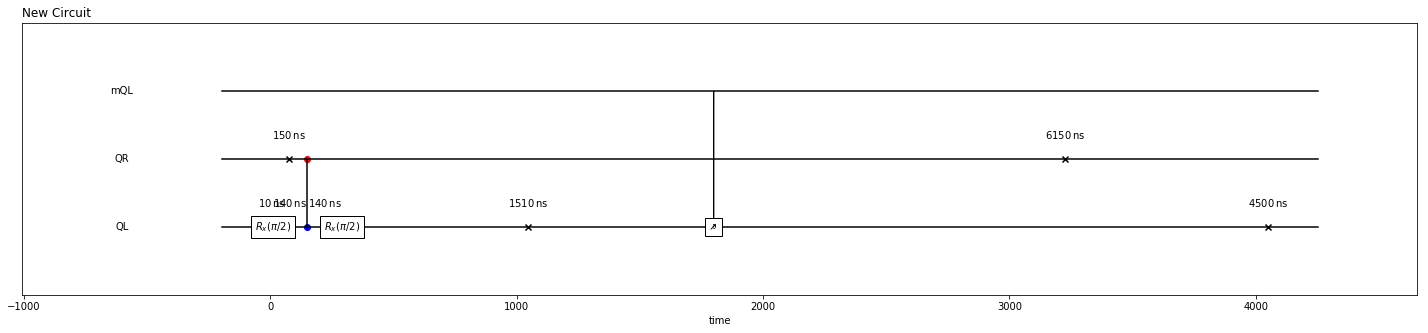

In [202]:
plt.figure(figsize=(25,5))
cir0.circuit.plot()

(<matplotlib.figure.Figure at 0x7f8231d71208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8231d710f0>)

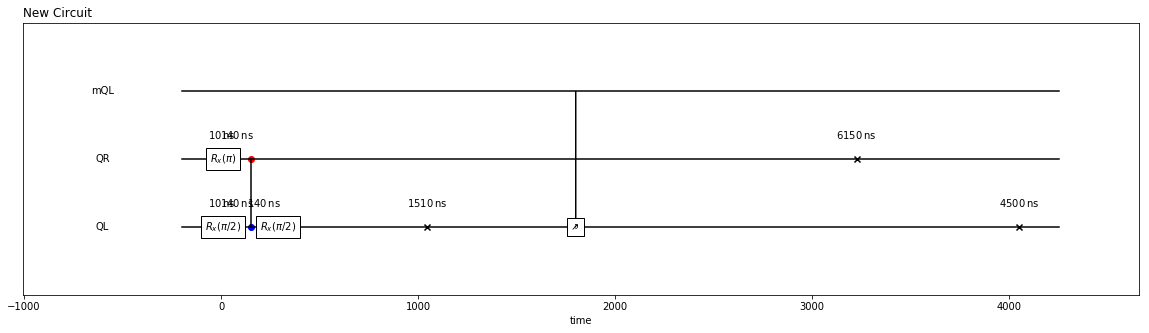

In [198]:
plt.figure(figsize=(20,5))
cir1.circuit.plot()

In [194]:
iterations = 1000
rounds = 30
out_bit0=np.zeros(rounds+1)
out_bit1=np.zeros(rounds+1)

result = []

for h in range(iterations):
    sdm0 = quantumsim.sparsedm.SparseDM(cir0.circuit.get_qubit_names())
    sdm1 = quantumsim.sparsedm.SparseDM(cir1.circuit.get_qubit_names())
    cir0.circuit.apply_to(sdm0)    
    cir1.circuit.apply_to(sdm1)
    out_bit0=np.zeros(rounds+1)
    out_bit1=np.zeros(rounds+1)
    
    for i in range(rounds):
        cir0.circuit.apply_to(sdm0)    
        cir0.circuit.apply_to(sdm1)
        out_bit0[i+1]=sdm0.classical['mQL']
        out_bit1[i+1]=sdm1.classical['mQL']
    result.append(out_bit0)
    result.append(out_bit1)
    
result = np.array(result).ravel()

result = np.array([result, np.zeros_like(result)])

In [248]:
print(result)

[[ 0.  0.  1. ...,  1.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [255]:
ls

DiCarloLab_quantum_simulations.py    __pycache__/
Multiround_parity_measurement.ipynb


In [249]:
import pycqed.analysis_v2.syndrome_analysis as a

In [250]:
from qcodes.instrument.base import Instrument

In [251]:
MC = Instrument.find_instrument('MC')
MC.close()

In [252]:
from pycqed.measurement import measurement_control as mc
MC = mc.MeasurementControl('MC', live_plot_enabled=False)

from pycqed.measurement import sweep_functions as swf
from pycqed.measurement import detector_functions as det

In [257]:
d.get_values()[0]

array([ 0.,  0.,  1., ...,  1.,  0.,  1.])

In [261]:
np.shape(result)

(2, 62000)

In [ ]:
%matplotlib inline

array([[ 0.,  0.,  1., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [275]:
d.detector_control

'hard'

In [276]:
s.sweep_control

'hard'

In [277]:
%xmode

Exception reporting mode: Verbose


In [286]:
np.shape(MC.detector_function.get_values())

(2, 30)

In [287]:
np.shape(result)

(2, 62000)

In [300]:
MC.set_sweep_function(swf.None_Sweep(sweep_control='hard'))
MC.set_sweep_points(np.linspace(0,10,30))
MC.set_detector_function(det.Dummy_Detector_Hard())
MC.run('Dummyhard')

Starting measurement: Dummyhard
Sweep function: None_Sweep
Detector function: Dummy_Detector_Hard
 100% completed 	elapsed time: 0.0s 	time left: 0.0s


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python

{'dset': array([[  0.        ,   0.        ,   1.        ],
        [  0.34482759,   0.10954177,   0.99398219],
        [  0.68965517,   0.21776513,   0.9760012 ],
        [  1.03448276,   0.32336756,   0.94627344],
        [  1.37931034,   0.42507806,   0.9051567 ],
        [  1.72413793,   0.52167248,   0.85314584],
        [  2.06896552,   0.61198826,   0.79086685],
        [  2.4137931 ,   0.69493838,   0.71906929],
        [  2.75862069,   0.7695245 ,   0.63861729],
        [  3.10344828,   0.83484892,   0.55047914],
        [  3.44827586,   0.89012541,   0.45571564],
        [  3.79310345,   0.93468871,   0.35546733],
        [  4.13793103,   0.96800245,   0.25094074],
        [  4.48275862,   0.98966569,   0.14339393],
        [  4.82758621,   0.9994177 ,   0.03412129],
        [  5.17241379,   0.9971411 ,  -0.07556203],
        [  5.51724138,   0.9828633 ,  -0.18433591],
        [  5.86206897,   0.95675614,  -0.29089119],
        [  6.20689655,   0.91913383,  -0.39394542],
    

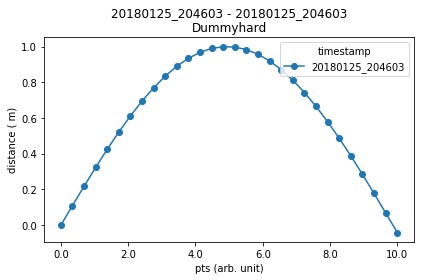

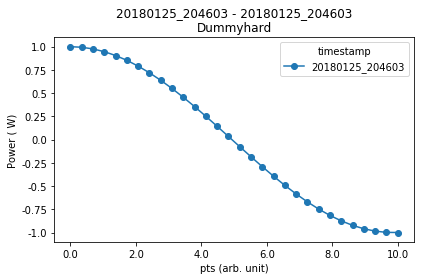

In [302]:
ma2.Basic1DAnalysis()
ma2.Basic1DAnalysis(options_dict={'close_figs':False})

In [293]:
np.shape(d.get_values())

(2, 62000)

In [294]:
len(result[0])

62000

In [295]:
MC.sweep_points

AttributeError: 'MeasurementControl' object and its delegates have no attribute 'sweep_points'

In [307]:
result_new = copy(result)

In [309]:
result_new = result[:, :30]

In [310]:
result_new

array([[ 0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

In [312]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [316]:
s = swf.None_Sweep(sweep_control='hard')
MC.set_sweep_function(s)

def return_results():
    #return result.T
    return result_new.reshape(2, -1)

d = det.Function_Detector(return_results, value_names=['Ancilla', 'Data'],value_units=['',''], detector_control='hard')
x=np.arange(len(result_new[0]))
#d = det.Function_Detector(return_results, value_names=['Ancilla'], detector_control='hard')
MC.set_sweep_points(x)
MC.set_detector_function(d)
MC.run('Simulation')
# ma2.Basic1DAnalysis(options_dict={'close_figs':False})

Starting measurement: Simulation
Sweep function: None_Sweep
Detector function: Function_Detector
 100% completed 	elapsed time: 0.0s 	time left: 0.0s


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 992, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 838, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 575, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python

{'dset': array([[  0.,   0.,   0.],
        [  1.,   0.,   0.],
        [  2.,   1.,   0.],
        [  3.,   0.,   0.],
        [  4.,   1.,   0.],
        [  5.,   1.,   0.],
        [  6.,   0.,   0.],
        [  7.,   0.,   0.],
        [  8.,   1.,   0.],
        [  9.,   0.,   0.],
        [ 10.,   1.,   0.],
        [ 11.,   0.,   0.],
        [ 12.,   1.,   0.],
        [ 13.,   0.,   0.],
        [ 14.,   1.,   0.],
        [ 15.,   0.,   0.],
        [ 16.,   1.,   0.],
        [ 17.,   0.,   0.],
        [ 18.,   0.,   0.],
        [ 19.,   1.,   0.],
        [ 20.,   0.,   0.],
        [ 21.,   1.,   0.],
        [ 22.,   0.,   0.],
        [ 23.,   1.,   0.],
        [ 24.,   0.,   0.],
        [ 25.,   1.,   0.],
        [ 26.,   0.,   0.],
        [ 27.,   1.,   0.],
        [ 28.,   0.,   0.],
        [ 29.,   1.,   0.]]),
 'sweep_parameter_names': ['pts'],
 'sweep_parameter_units': ['arb. unit'],
 'value_names': ['Ancilla', 'Data'],
 'value_units': ['', '']}

In [315]:
ma.a_tools.datadir

'/home/xabomon/GitHubRepos/DiCarloLab/PycQED_py3/data'

In [317]:
ma.MeasurementAnalysis()

IndexError: too many indices for array

In [304]:
from pycqed.analysis import measurement_analysis as ma

In [305]:
ma.MeasurementAnalysis()

IndexError: too many indices for array

In [243]:
MC.datadir()

'/home/xabomon/GitHubRepos/DiCarloLab/PycQED_py3/data'

In [239]:

s.sweep_control

'soft'

In [244]:
from pycqed.analysis_v2 import measurement_analysis as ma2

In [247]:
ma2.Basic1DAnalysis()

IndexError: too many indices for array

In [246]:
ma2.One_Qubit_Paritycheck_Analysis(options_dict={'post_sel_th_anc':0.5,
                                                 'post_sel_th_data':0.5,
                                                 'nr_of_meas':rounds+1})

IndexError: too many indices for array